# Project Goal/Business Understanding

This project aims to draw some compelling (and hopefully not stereotypical) personality profiles of programmers, particularly professional developers based in the US.

This notebook focuses on one particular personality trait - <b>competitiveness</b>. 

Below are the questions we are going to answer through the lens of this project:

- Do more or fewer programmers think they are competing with their peers?
- What factors might be associated with people’s competitiveness?
	- Does gender matter?
	- Does race matter?
	- Do the years of coding experience on the job matter?
	- Does the type of developer matter?
	- Does the type or the size of the company people work for matter?
- Are competitive programmers tend to be satisfied with their jobs or not?

# Data Understanding

The 2017 Stack Overflow Developer Survery asked many interesting questions related to personality type. <br>

For the purpose of this study, we are particularly interested in  people's response to the below survey question on competitiveness - <br>

<i><b>"I think of myself as competing with my peers"</b></i>

# Prepare Data

In [1]:
import pandas as pd
import statsmodels.api as sm

In [2]:
import Modules.utilities as u
import Modules.clean_data_frame as cd
import Modules.create_comp_table as ct
import Modules.inferential_statistics as s

In [3]:
survey17 = pd.read_csv('./Data/survey_results_public_2017.csv')

People’s perceptions of personality are largely dependent on culture and their current state of life. So to compare apples to apples, we are only going to look at US respondents who are also professional developers. We ended up with about 3,300 respondents.

In [4]:
surveyFiltered = survey17.loc[(survey17['Country'] == 'United States') \
                              & (survey17['Professional'] == 'Professional developer')]

In [5]:
print('We have {} respondents left for our analysis.'.format(surveyFiltered.shape[0]))

We have 3230 respondents left for our analysis.


There are four types of responses for those questions mentioned above: “Agree”, “Somewhat agree”, “Disagree”, and “Strongly disagree”. <br> 

I grouped those responses into two buckets: “Agree” and “Disagree” before performing statistical tests to ensure that we have enough data in each bucket to meet the condition for performing those statistical tests.

In [7]:
res = 'CompetePeers_bin'

# For easy comparison and calculation, put survey response into agree (1) and disagree (0)
surveyFiltered = cd.binarize_col(surveyFiltered, 'CompetePeers', \
                                 ['Somewhat agree', 'Agree', 'Strongly agree'])

# Data Analysis and Modeling

<b>Methodology</b><br>
For each question, I will perform the <b>Chi-Square Test for Independence </b>to compare whether the variable of interest (e.g. gender, race) had any relationship with competitiveness. <br>

If the Chi-Square test showed a relationship between the variable and competitiveness, I will then perform <b> one proportion Z-test </b> for each group to see if within the group, whether the percentage of people who agreed with the statement was significantly higher or lower than 50% (random chance). <br>

To answer the question 'Are competitive programmers tend to be satisfied with their jobs or not?', I will perform a simple <b>one-variable linear regression</b> of job satisfaction (on a scale of 0 to 10) against the competitiveness indicator. 

### Q0: How did people answer all personality survey questions?
Let's first look at how people respond to all of the personality survey questions to get a general understanding.

In [8]:
traitLst = ['ProblemSolving', 'BuildingThings', 'LearningNewTech', 'ChallengeMyself', \
            'CompetePeers', 'BoringDetails', 'RightWrongWay']

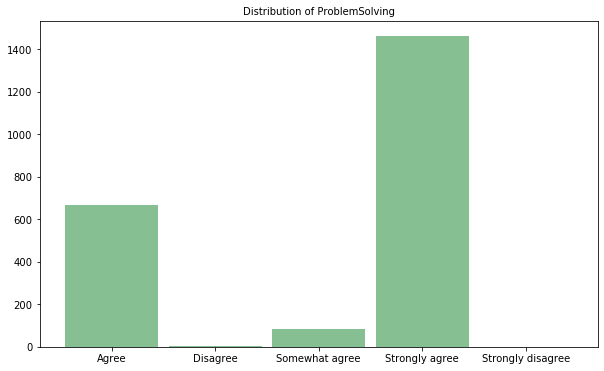

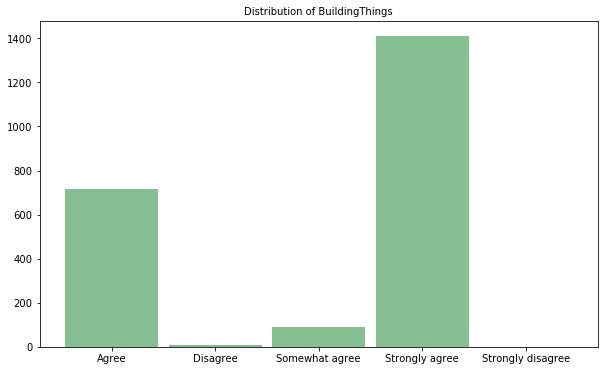

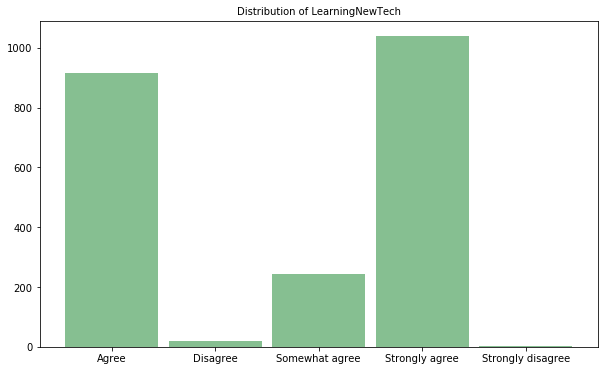

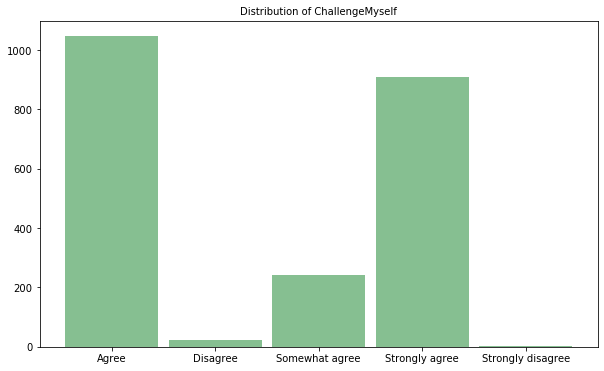

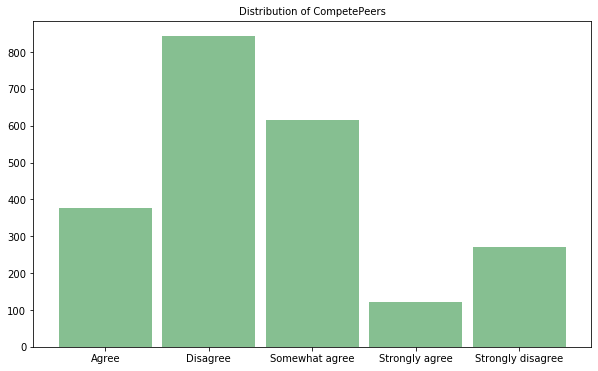

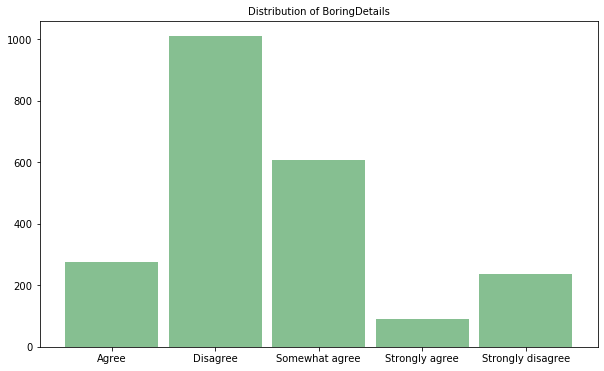

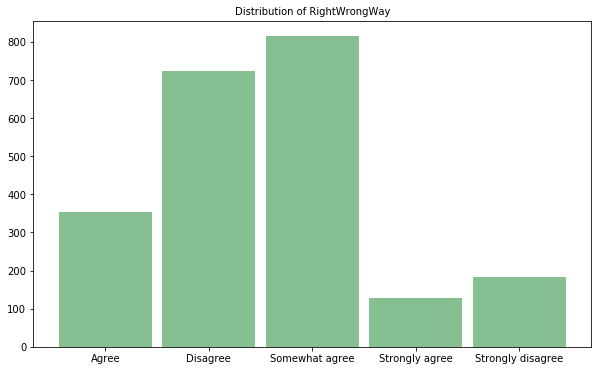

In [9]:
## draw distribution of each trait
for trait in traitLst:
    u.draw_hist_cat(df = surveyFiltered, col = trait)

The result of 'Problem Solving', 'Building Things', 'Learning New Tech', and 'Challenge Myself' are not surprising. A large majority of respondents describe themselves as problem solver. Most of the respondents also like building things, learning new technologies. and challenging themselves. Very much align with the typical developer personality profile :) <br>

'CompetePeers', 'Boring Details', and 'RightWrongWay' and  results are a lot more interesting, as almost half and half people agree and disagree with the statement. <br>

This notebook will take a deep dive into 'CompetePeers'.

### Q1: Does feeling more or less competitive depends on gender?

In [10]:
feature = 'Gender'

# clean and create a new df based on feature of interest
gender_df = cd.clean_df(surveyFiltered, feature)

In [11]:
# perform chi-square test for independence
s.print_chi2_test_result(gender_df, feature, res, ['agree', 'disagree'])

The p_value for chi-square test for independence between Gender and CompetePeers_bin is 0.16


The p-value is quite large. Under the significance level of 0.05, we are not able to reject the null hypothesis that gender and competitiveness are independent.

### Q2: Does feeling more or less competitive depends on race?

In [12]:
feature = 'Race'

# clean and create a new df based on feature of interest
race_df = cd.clean_df(surveyFiltered, feature)

In [13]:
# perform chi-square test for independence
s.print_chi2_test_result(race_df, feature, res, ['agree', 'disagree'])

The p_value for chi-square test for independence between Race and CompetePeers_bin is 0.01


Since the p-value is less than the significance level (0.05), we reject the null hypothesis and conclude that there is a relationship between Race and CompetePeers. Let's dig deeper!

In [14]:
ct.plot_comp_table(race_df, feature, res, rank_order_lst=None)

,value,total count,agree %,disagree %,difference %,significant?
0,White or of European descent,1515,0.47,0.53,-0.07,yes
1,East Asian,79,0.56,0.44,0.11,no
2,South Asian,56,0.64,0.36,0.29,yes
3,I prefer not to say,43,0.6,0.4,0.21,no
4,Hispanic or Latino/Latina,41,0.59,0.41,0.17,no


Based on only the statistically significant results, White or of European descent tend to feel less competitive against their peers. Whereas, South Asian tend to feel a lot competitive against their peers.

### Q3: Do you feel more or less competitive as your years of coding experience increase?

In [15]:
feature = 'YearsCodedJob'

In [16]:
# The original dataset has each incremental year of experience as a bucket, which might be too granular to provide much value.
# Instead, bucket every 5 years of coding exeprience into one.
yearsCodedJob_mapping = {
    'Less than a year': '0-5 years',
    '1 to 2 years': '0-5 years',
    '2 to 3 years': '0-5 years',
    '3 to 4 years': '0-5 years',
    '4 to 5 years': '0-5 years',
    '5 to 6 years': '5-10 years',
    '6 to 7 years': '5-10 years',
    '7 to 8 years': '5-10 years',
    '8 to 9 years': '5-10 years',
    '9 to 10 years': '5-10 years',
    '10 to 11 years': '10-15 years',
    '11 to 12 years': '10-15 years',
    '12 to 13 years': '10-15 years',
    '13 to 14 years': '10-15 years',
    '14 to 15 years': '10-15 years',
    '15 to 16 years': '15-20 years',
    '16 to 17 years': '15-20 years',
    '17 to 18 years': '15-20 years',
    '18 to 19 years': '15-20 years',
    '19 to 20 years': '15-20 years',
    '20 or more years': '20 or more years'
}

In [18]:
yearsCodedJob_df = surveyFiltered.dropna(subset =[feature], axis=0)
yearsCodedJob_df.loc[:, feature] = yearsCodedJob_df[feature].apply(lambda col: \
                                                                   yearsCodedJob_mapping[col])

In [19]:
# perform chi-square test for independence
s.print_chi2_test_result(yearsCodedJob_df, feature, res, ['agree', 'disagree'])

The p_value for chi-square test for independence between YearsCodedJob and CompetePeers_bin is 0.00


Since the p-value is less than the significance level (0.05), we reject the null hypothesis and conclude that there is a relationship between YearsCodedJob and CompetePeers. <br>

Let's take a deeper look into what does the relationship look like - 

In [20]:
yearsCodedJob_lst = ['0-5 years','5-10 years','10-15 years', '15-20 years', '20 or more years']
ct.plot_comp_table(yearsCodedJob_df, feature, res, rank_order_lst=yearsCodedJob_lst)

,value,total count,agree %,disagree %,difference %,significant?
0,0-5 years,812,0.54,0.46,0.08,yes
1,5-10 years,526,0.49,0.51,-0.02,no
2,10-15 years,304,0.56,0.44,0.11,yes
4,15-20 years,207,0.44,0.56,-0.11,no
3,20 or more years,367,0.41,0.59,-0.18,yes


Let's only look at results that are statistically significant - <br>

Somewhat expected, folks with less than 5 years of coding experience tend to feel a lot more competitive against their peers compared to the rest of the coding experience group.<br>

Folks with 10-15 years of experience become more competitive. Maybe because 10-15 years is around the time people are competing to become staff engineer/manager? <br>

Respondents with more than 20 years of experience are a lot less competitive against their peers. At this point, really, you've finally reached the point where you can competite only with yourself. <br>

### Q4: Do respondents of certain developer types tend to be more competitive?

In [21]:
feature = 'DeveloperTypeCombined'

# clean 'DeveloperTypeCombined'
## 1.combine all different types of developer types entries into one column
## 2.retrieve more granular developer type since more than 70% of the respondents put 'web developer' as their developer type
## 3.assign 'QA engineers' to 'Other' type since there are only two of them
## 4.assign 'Developer with a statistics or mathematics background' as 'Data scientist', since most of them indicated themselves also as 'Data scientist'

devTypes_lst = ['DeveloperType', 'WebDeveloperType', 'MobileDeveloperType', 'NonDeveloperType']
devTypes_df = cd.clean_dev_type(surveyFiltered, feature, devTypes_lst)

In [22]:
# perform chi-square test for independence
s.print_chi2_test_result(devTypes_df, feature, res, ['agree', 'disagree'])

The p_value for chi-square test for independence between DeveloperTypeCombined and CompetePeers_bin is 0.08


Under the significance level of 0.05, we are not able to reject the null hypothesis under the significance level. <br> 

However, since the p-value is only slightly higher than the significance level, it might still worth of time to look into the competitiveness under different DeveloperTypes.

In [23]:
ct.plot_comp_table(devTypes_df, feature, res, rank_order_lst=None)

,value,total count,agree %,disagree %,difference %,significant?
0,Full stack Web developer,502,0.51,0.49,0.03,no
1,Mobile developer,368,0.53,0.47,0.07,no
2,Desktop applications developer,334,0.5,0.5,0,no
3,Data scientist,181,0.51,0.49,0.03,no
4,Embedded applications/devices developer,155,0.43,0.57,-0.14,yes
5,Other,145,0.45,0.55,-0.1,no
6,DevOps specialist,81,0.63,0.37,0.26,yes
7,Back-end Web developer,117,0.43,0.57,-0.15,no
8,Database administrator,88,0.55,0.45,0.09,no
9,Front-end Web developer,84,0.48,0.52,-0.05,no


A significantly larger share of DevOps specialists think they are competing with their peers compared to developers of other developer types. In fact, embedded applications/devices developers and graphics programming developers are much less likely to think they are competiting with their peers. 

### Q5: Do you feel more or less competitive in a small company or in a large company

In [24]:
feature = 'CompanySize'

# clean 'CompanySize'
## 1.drop rows where entry is NA
## 2.drop rows where the response is 'I prefer not to answer' or "I don't know" 
companySize_df = cd.clean_df(surveyFiltered, feature, ['I prefer not to answer', "I don't know"])

In [25]:
# perform chi-square test for independence
s.print_chi2_test_result(companySize_df, feature, res, ['agree', 'disagree'])

The p_value for chi-square test for independence between CompanySize and CompetePeers_bin is 0.46


The p-value is very large. Under the significance level of 0.05, we are not able to reject the null hypothesis that CompanySize and competitiveness are independent.

### Q6: What about company type?

In [26]:
feature = 'CompanyType'
# clean 'CompanyType'
## 1.drop rows where entry is NA
## 2.drop rows where the response is 'I prefer not to answer' or "I don't know" 
companyType_df = cd.clean_df(surveyFiltered, feature, ['I prefer not to answer', "I don't know"])

In [27]:
# perform chi-square test for independence
s.print_chi2_test_result(companyType_df, feature, res, ['agree', 'disagree'])

The p_value for chi-square test for independence between CompanyType and CompetePeers_bin is 0.13


The p-value is quite large. Under the significance level of 0.05, we are not able to reject the null hypothesis that CompanyType and competitiveness are independent.

### Q7: What about company type and size together?

In [28]:
companySizeType_df = cd.clean_df(companySize_df, 'CompanyType', \
                                 ['I prefer not to answer', "I don't know"])

In [29]:
feature = 'CompanySizeType'

companySizeType_df[feature] = \
companySizeType_df['CompanyType'] + ' (' + companySizeType_df['CompanySize'] + ')'

companySizeType_df = cd.clean_df(companySizeType_df, feature, \
                                 ['I prefer not to answer', "I don't know"])

In [30]:
# perform chi-square test for independence
s.print_chi2_test_result(companySizeType_df, feature, res, ['agree', 'disagree'])

The p_value for chi-square test for independence between CompanySizeType and CompetePeers_bin is 0.04


Since the p-value is less than the significance level (0.05), we reject the null hypothesis and conclude that there is a relationship between Company Size <b>and</b> Type and CompetePeers.

In [31]:
ct.plot_comp_table(companySizeType_df, feature, res)

,value,total count,agree %,disagree %,difference %,significant?
0,"Publicly-traded corporation (10,000 or more employees)",323,0.54,0.46,0.09,no
1,"Privately-held limited company, not in startup mode (100 to 499 employees)",182,0.53,0.47,0.05,no
2,"Privately-held limited company, not in startup mode (20 to 99 employees)",177,0.49,0.51,-0.03,no
3,"Publicly-traded corporation (1,000 to 4,999 employees)",105,0.46,0.54,-0.09,no
4,"Privately-held limited company, not in startup mode (1,000 to 4,999 employees)",76,0.54,0.46,0.08,no
5,"Privately-held limited company, not in startup mode (10 to 19 employees)",58,0.6,0.4,0.21,no
6,"Publicly-traded corporation (5,000 to 9,999 employees)",67,0.49,0.51,-0.01,no
7,"Privately-held limited company, not in startup mode (10,000 or more employees)",40,0.8,0.2,0.6,yes
8,Venture-funded startup (100 to 499 employees),81,0.4,0.6,-0.21,yes
9,"Privately-held limited company, not in startup mode (500 to 999 employees)",64,0.5,0.5,0,no


The only two significant results are for Privately-held limited company with 10,000 or more employees and Venture-funded startup with 100 to 499 employees. <br>

People working for Privately-held limited company with 10,000 or more employees are a lot more likely to feel competitive with their peers. Whereas, people working for venture-funded startup (100 to 499 employees) are a lot less likely to feel competitive with their peers. 

### Q8: Does being competitive against peers affect the job satisfaction?

In [32]:
df = surveyFiltered.dropna(subset= ['JobSatisfaction'], axis=0)
X = df[['CompetePeers_bin']]
y = df['JobSatisfaction']

X2 = sm.add_constant(X.to_numpy())
lm_model = sm.OLS(y, X2).fit()
print(lm_model.summary())

                            OLS Regression Results                            
Dep. Variable:        JobSatisfaction   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     9.850
Date:                Tue, 08 Dec 2020   Prob (F-statistic):            0.00172
Time:                        01:07:45   Log-Likelihood:                -4657.5
No. Observations:                2172   AIC:                             9319.
Df Residuals:                    2170   BIC:                             9330.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3481      0.063    117.021      0.0

Of course job satisfaction will not be solely affected by whether you feel competitive against peers or not (the R-square is only 0.005). However, based on the simple linear regression model above, feeling competitive against peers lowers the job satisfaction by 0.28 and the effect is statistically significant (p-value < 0.002). As such, holding other factors constant, feeling less competitive against peers would most likely improve your job satisfaction a bit.

# Evaluate the Results

- <b>Does gender matter?</b><br>
    - The p-value for the Chi-Square Test for Independence = 0.16<br>
      Not able to reject the null hypothesis that gender and competitiveness are independent<br><br>

- <b>Does race matter?</b><br>
    - The p-value for the Chi-Square Test for Independence = 0.01<br>
      Reject the null hypothesis and conclude that there is some relationship between race and competitiveness<br><br>
      
    - White or of European descent tend not to compete with peers<br>
    - South Asians do tend to compete with peers<br><br>

- <b>Do the years of coding experience on the job matter?</b>
    - The p-value for the Chi-Square Test for Independence = 0.00<br>
      Reject the null hypothesis and conclude that there is some relationship between years of coding experience on the job and competitiveness<br><br>
    
    - People with less than 5 years of coding experience tend to feel a lot more competitive<br>

    - People with 10–15 years of experience are also more competitive<br>

    - People with more than 20 years of experience are a lot less competitive with their peers<br><br>

- <b>Does the type of developer matter?</b><br>
    - The p-value for the Chi-Square Test for Independence = 0.08<br><br>
    
    - DevOps specialists tend to feel more competitive<br>
    - Embedded applications/devices developers and graphics programming developers tend to feel less competitive<br><br>

- <b>Does the size of the company people work for matter?</b><br>
    - The p-value for the Chi-Square Test for Independence = 0.46<br>
      Not able to reject the null hypothesis that the size of the company and competitiveness are independent.<br><br>

- <b>Does the type of the company people work for matter?</b><br>
    - The p-value for the Chi-Square Test for Independence = 0.13<br>
      Not able to reject the null hypothesis that the type of the company and competitiveness are independent.<br><br>

- <b>What about different types of companies with different sizes? Does it matter?</b><br>
    - The p-value for the Chi-Square Test for Independence = 0.04<br>
      Reject the null hypothesis and conclude that there is some relationship between different types of companies with different sizes and competitiveness.<br><br>

    - People working for privately-held limited companies with 10,000 or more employees were a lot more likely to feel competitive with their peers<br>

    - People working for venture-funded startups (100 to 499 employees) were a lot less competitive<br><br>

- <b>Are competitive programmers tend to be satisfied with their jobs or not?</b><br>
    - Feeling competitive with peers lowers job satisfaction by 0.28 and the effect is statistically significant (p-value < 0.002)